In [289]:
import json
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
fig_dims = (12, 8)
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from openpyxl import Workbook

In [266]:
def gen_eval_metrics(y_test, pred):
    print("Accuracy:", accuracy_score(y_test, pred))
    print("F1:", f1_score(y_test, pred))
    print("Recall:", recall_score(y_test, pred))
    print("Precision:", precision_score(y_test, pred))
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
    print(classification_report(y_test,pred))

In [267]:
with open('data.json') as json_file:
    data = json.load(json_file)
    
data = pd.DataFrame.from_dict(data, orient='index')
data.reset_index(level=0, inplace=True)
data = data.transpose()
new_header = data.iloc[0] #grab the first row for the header
data = data[1:] #take the data less the header row
data.columns = new_header #set the header row as the df header
coefficients_label = list(data.keys())
coefficients_label.remove('Faulty')

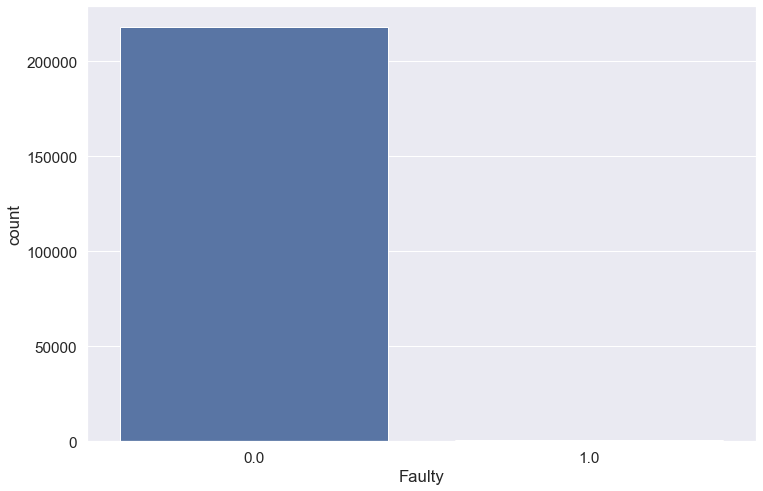

In [268]:
fig, ax = plt.subplots(figsize=fig_dims)
sns_countplot = sns.countplot(x="Faulty", data=data)
figure = sns_countplot.get_figure() 

In [269]:
data.Faulty.value_counts()

0.0    217998
1.0       700
Name: Faulty, dtype: int64

In [270]:
y = data['Faulty']
y = y.astype(int)
X = data.loc[:, data.columns != 'Faulty']
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = x_scaled
df = pd.DataFrame(X)
df.columns = coefficients_label
df['Faulty'] = y 
df.head()
#X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X), y, test_size=0.25, random_state=27)
#len(X_train), len(y_train)

,Least Contradiction,Anderberg,Phi-Coefficient,Support,Odd Multiplier,Jaccard,Interest,Goodman and Kruskal,Accuracy,Interestingness Weighting Dependency,...,Sorensen-Dice,One-Way Support,Yule's Y,J-Measure,Piatetsky-Shapiro,Gini Index,Yule's Q,Relative Risk,Tarantula,Faulty
0,0.987041,0.197408,0.558776,0.055237,0.001913,0.141006,0.000739,0.125,0.659259,0.157558,...,0.24676,0.041194,1.0,0.013921,0.423868,0.087872,1.0,0.0,0.652174,0
1,0.987041,0.197408,0.558776,0.055237,0.001913,0.141006,0.000739,0.125,0.659259,0.157558,...,0.24676,0.041194,1.0,0.013921,0.423868,0.087872,1.0,0.0,0.652174,0
2,1.000000,1.000000,1.000000,0.055237,0.000000,1.000000,0.005947,1.000,1.000000,0.949014,...,1.00000,0.377360,1.0,0.039123,0.473251,0.209877,1.0,0.0,1.000000,1
3,0.987041,0.197408,0.558776,0.055237,0.001913,0.141006,0.000739,0.125,0.659259,0.157558,...,0.24676,0.041194,1.0,0.013921,0.423868,0.087872,1.0,0.0,0.652174,0
4,0.987041,0.197408,0.558776,0.055237,0.001913,0.141006,0.000739,0.125,0.659259,0.157558,...,0.24676,0.041194,1.0,0.013921,0.423868,0.087872,1.0,0.0,0.652174,0


In [272]:
df_faulty = df.loc[df['Faulty'] == 1]
df_notFaulty = df.loc[df['Faulty'] == 0][:700]

In [273]:
frames = [df_faulty, df_notFaulty]
df_balanced = pd.concat(frames)

In [274]:
df_balanced.Faulty.value_counts()

0    700
1    700
Name: Faulty, dtype: int64

In [275]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, f1_score, recall_score

In [276]:
y = df_balanced['Faulty'].values
X = df_balanced.loc[:, df_balanced.columns != 'Faulty'].values
df_X = df_balanced.loc[:, df_balanced.columns != 'Faulty']

In [277]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X), y, test_size=0.25, random_state=27)
len(X_train), len(y_train)

(1050, 1050)

In [278]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}
clf = RandomForestClassifier()
model_RF = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
model_RF.fit(X_train,y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 142, 274, 406, 538,
                                                      671, 803, 935, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [5, 7, 10, 14],
                                        'n_estimators': [151, 267, 384, 500,
                                                         617, 733, 850, 966,
                                                         1083, 1200]},
                   random_state=101, verbose=5)

<AxesSubplot:xlabel='param_criterion', ylabel='param_n_estimators'>

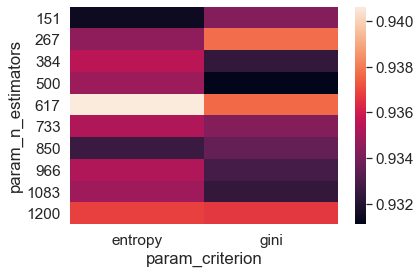

In [279]:
import seaborn as sns

table = pd.pivot_table(pd.DataFrame(model_RF.cv_results_),
    values='mean_test_score', index='param_n_estimators', 
                       columns='param_criterion')
     
sns.heatmap(table)

Accuracy: 0.96
F1: 0.9613259668508287
Recall: 0.925531914893617
Precision: 1.0
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       162
           1       1.00      0.93      0.96       188

    accuracy                           0.96       350
   macro avg       0.96      0.96      0.96       350
weighted avg       0.96      0.96      0.96       350



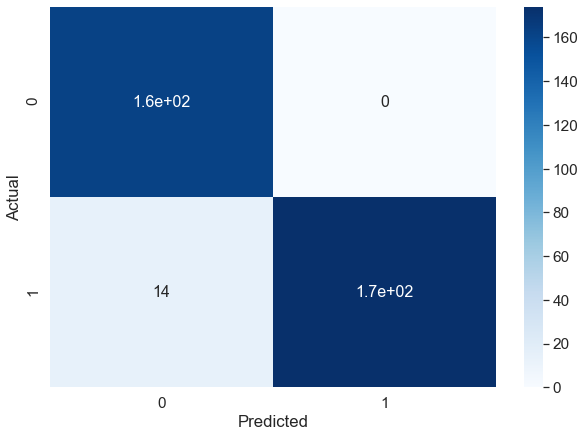

In [280]:
pred = model_RF.predict(X_test)
gen_eval_metrics(y_test, pred)

In [ ]:
#########################################################

In [291]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn.linear_model as lm

# prepare configuration for cross validation test harness
seed = 7
# prepare models
classifiers = [
    ('LR',lm.LogisticRegression(solver='liblinear', random_state=0)),
    ('KNN',KNeighborsClassifier(3)),
    ('SVM', SVC(kernel="linear", C=0.025, probability=True)),
    ('NuSVC', NuSVC(probability=True)),
    ('DT', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('XGB', XGBClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('GradientBoost', GradientBoostingClassifier()),
    ('GaussianNB', GaussianNB()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('QDA', QuadraticDiscriminantAnalysis())]


eval_metrics = ['accuracy', 'f1', 'precision', 'recall']
dict_results = {
    'name' : list(),
    'accuracy' : list(),
    'f1' : list(), 
    'precision': list(), 
    'recall' : list()
               }

for name, clf in classifiers:
    dict_results['name'].append(clf.__class__.__name__)
    
    for scoring in eval_metrics:
        kfold = model_selection.KFold(n_splits=10, shuffle=True)
        cv_results = model_selection.cross_val_score(clf, X, y, cv=kfold, scoring=scoring)

        msg = "%s %s: %f (%f)" % (clf.__class__.__name__, scoring, cv_results.mean(), cv_results.std())
        print(msg)
        
        if scoring == 'accuracy':
            dict_results['accuracy'].append(round(cv_results.mean(), 2))
        elif scoring == 'f1':
            dict_results['f1'].append(round(cv_results.mean(), 2))
        elif scoring == 'precision':
            dict_results['precision'].append(round(cv_results.mean(), 2))
        elif scoring == 'recall':
            dict_results['recall'].append(round(cv_results.mean(), 2))
        

LogisticRegression accuracy: 0.910000 (0.026380)
LogisticRegression f1: 0.907098 (0.022026)
LogisticRegression precision: 0.961857 (0.021109)
LogisticRegression recall: 0.861837 (0.044741)
KNeighborsClassifier accuracy: 0.779286 (0.033266)
KNeighborsClassifier f1: 0.816230 (0.027983)
KNeighborsClassifier precision: 0.700916 (0.025315)
KNeighborsClassifier recall: 0.985752 (0.010600)
SVC accuracy: 0.900000 (0.024537)
SVC f1: 0.892536 (0.025510)
SVC precision: 0.952144 (0.019900)
SVC recall: 0.841164 (0.022536)
NuSVC accuracy: 0.888571 (0.020000)
NuSVC f1: 0.882213 (0.027038)
NuSVC precision: 0.929765 (0.038454)
NuSVC recall: 0.839717 (0.060235)
DecisionTreeClassifier accuracy: 0.952857 (0.010690)
DecisionTreeClassifier f1: 0.948251 (0.015877)
DecisionTreeClassifier precision: 0.971973 (0.018133)
DecisionTreeClassifier recall: 0.930539 (0.037439)
RandomForestClassifier accuracy: 0.952857 (0.010202)
RandomForestClassifier f1: 0.949074 (0.023767)
RandomForestClassifier precision: 0.973351 

[13:35:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:35:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:35:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:35:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [293]:
df_results = pd.DataFrame(dict_results)
df_results.to_excel('results.xlsx', index=False)

In [ ]:
#########################################################

In [317]:
models_feature_importance = [GradientBoostingClassifier(), AdaBoostClassifier(), XGBClassifier(), RandomForestClassifier(),DecisionTreeClassifier()]

for k, clf in enumerate(models_feature_importance):
    clf.fit(X,y)
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = df_X.columns
    top_ten_imp_features = []
    print("Feature ranking:", k)
    for c, f in enumerate(range(X.shape[1])):
        if c < 10:
            #print("%s : (%f)" % (feature_names[f] , importances[indices[f]]))
            top_ten_imp_features.append(feature_names[f])
    if k==0:
        common_features = set(top_ten_imp_features).intersection(feature_names)
    else:
        common_features = common_features.intersection(set(top_ten_imp_features))
print(common_features)

Feature ranking: 0
Feature ranking: 1
[14:07:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature ranking: 2
Feature ranking: 3
Feature ranking: 4
{'Phi-Coefficient', 'Support', 'Jaccard', 'Least Contradiction', 'Interestingness Weighting Dependency', 'Goodman and Kruskal', 'Accuracy', 'Odd Multiplier', 'Interest', 'Anderberg'}
